<a href="https://colab.research.google.com/github/PragyaShukla2580/Loan/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Wine Quality Prediction**



Forget apples. Instead, it's a glass of red wine a day that may keep the doctor away. Studies show red wine may protect the heart and control cholesterol levels, among other benefits. And these protective qualities have been mostly attributed to two components in red wine: the alcohol and the grape’s antioxidants.

**To Drink, or Not to Drink? — The Answer/Debate** Not a fan of red? While it lacks the reservatol present in red wine, white wine, might be just as protective of the heart and— even the lungs — as long as it’s rich in other antioxidants like tyrosol and hydroxytyrosol .

But, alas, all wines are not created equal. Dark red wines made from a grape with thick skin, like Malbec, are full of resveratrol. Other antioxidant winners include Cabernet Sauvignon, Pinor Noir, and Chardonnay . Don’t drink (or simply can’t stand) either? Consider purple grape juice or a resveratrol supplement to reap similar benefits.

One thing to keep in mind: one serving of wine is only five ounces. Drinking the whole bottle doesn’t double (or quadruple) the benefits, and drinking too much can lead to cancers and other diseases. Like any indulgence, moderation is key: the USDA recommends no more than five ounces for women and ten ounces for men per day. With these limitations in mind, go grab that glass.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

wine = pd.read_csv('winequality-red.csv')

In [ ]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine[wine.isnull()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**The data is clean.**

**Acidity**

The acids in wine are an important component in both winemaking and the finished product of wine. They are present in both grapes and wine, having direct influences on the color, balance and taste of the wine as well as the growth and vitality of yeast during fermentation and protecting the wine from bacteria.

Three primary acids are found in wine grapes: **tartaric, malic and citric acids.** During the course of winemaking and in the finished wines, acetic, butyric, lactic and succinic acids can play significant roles. Most of the acids involved with wine are fixed acids with the notable exception of acetic acid, mostly found in vinegar, which is volatile and can contribute to the wine fault known as volatile acidity. Sometimes, additional acids, such as ascorbic, sorbic and sulfurous acids, are used in winemaking.

**Comparison of Acidity with Quality**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


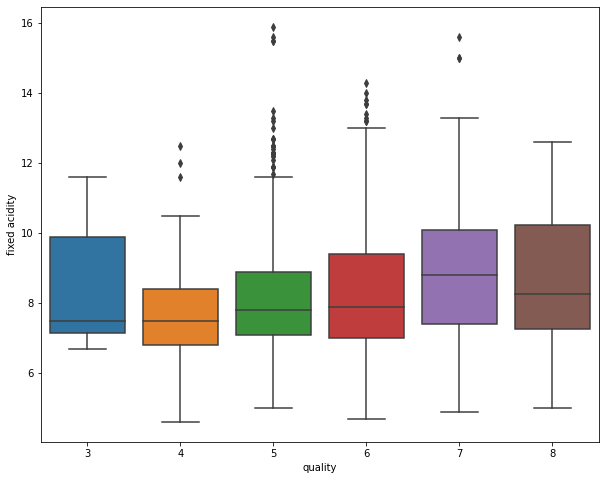

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(wine['quality'],wine['fixed acidity'])

The measure of the amount of acidity in wine is known as the “titratable acidity” or “total acidity”, which refers to the test that yields the total of all acids present, **while strength of acidity is measured according to pH, with most wines having a pH between 2.9 and 3.9. Generally, the lower the pH, the higher the acidity in the wine.** This can be seen in the graph below.

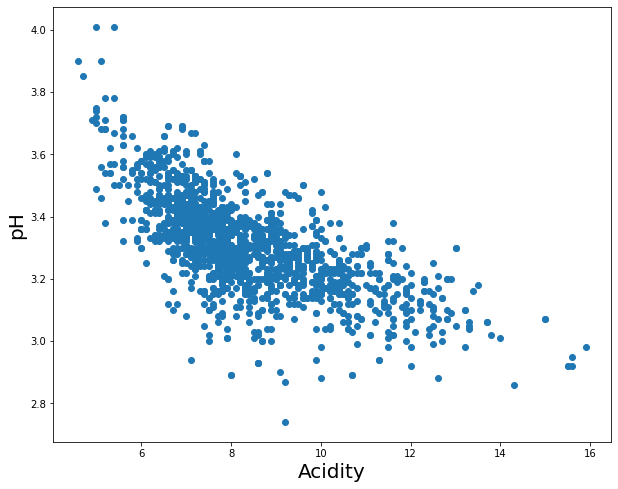

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(wine['fixed acidity'],wine['pH'])
plt.xlabel('Acidity').set_size(20)
plt.ylabel('pH').set_size(20)

However, there is no direct connection between total acidity and pH (it is possible to find wines with a high pH for wine and high acidity).[1] In wine tasting, **the term “acidity” refers to the fresh, tart and sour attributes of the wine which are evaluated in relation to how well the acidity balances out the sweetness and bitter components of the wine such as tannins.**

**Acidity in wine is important.**

**As much as modern health has demonized acidic foods, acidity is an essential trait in wine that’s necessary for quality.** Great wines are in balance with their 4 fundamental traits (Acidity, tannin, alcohol and sweetness) and as wines age, the acidity acts as a buffer to preserve the wine longer. For example, Sauternes, a wine with both high acidity and sweetness, is known to age several decades.

Let us see if pH/Acidity is related to the overal quality rating.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


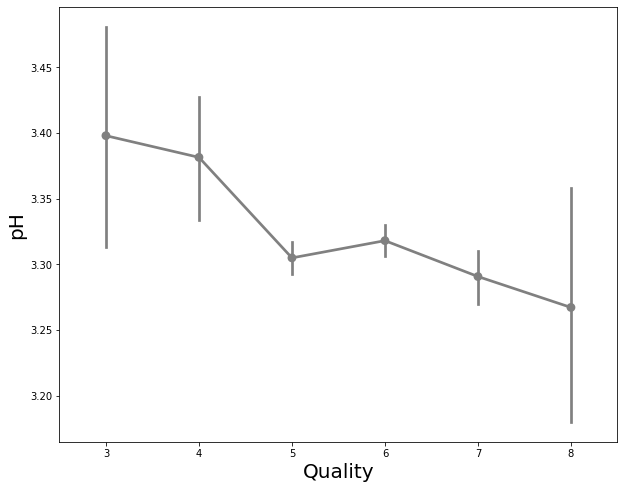

In [ ]:
plt.figure(figsize=(10,8))
sns.pointplot(wine['quality'],wine['pH'], color='grey')
plt.xlabel('Quality').set_size(20)
plt.ylabel('pH').set_size(20)

**We can infer that higher quality wines have a comparatively low pH/high Acidity**

**Citric Acid**

While very common in citrus fruits, such as limes, citric acid is found only in very minute quantities in wine grapes. It often has a concentration about 1/20 that of tartaric acid. The citric acid most commonly found in wine is commercially produced acid supplements derived from fermenting sucrose solutions.

These inexpensive supplements can be used by winemakers in acidification to boost the wine's total acidity. It is used less frequently than tartaric and malic due to the aggressive citric flavors it can add to the wine. When citric acid is added, it is always done after primary alcohol fermentation has been completed due to the tendency of yeast to convert citric into acetic acid.

**In the European Union, use of citric acid for acidification is prohibited, but limited use of citric acid is permitted for removing excess iron and copper from the wine if potassium ferrocyanide is not available.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


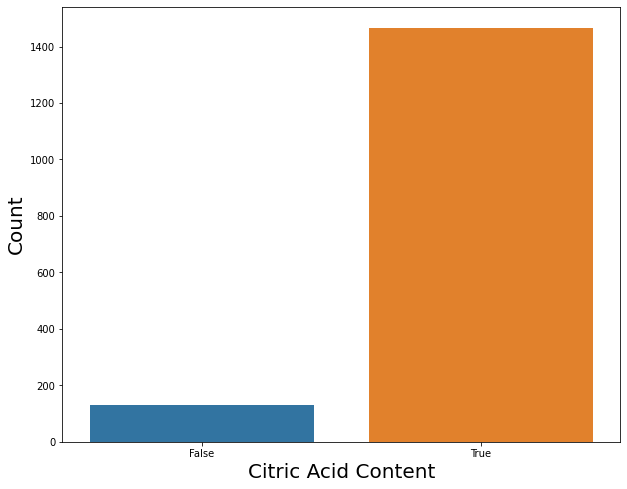

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(wine['citric acid'] > 0)
plt.xlabel('Citric Acid Content').set_size(20)
plt.ylabel('Count').set_size(20)

**From the above graph, we can infer that approximately 180-200 wines are European.**

**Sulfur Dioxide**

Sulfur dioxide plays two important roles. Firstly, it is an anti-microbial agent, and as such is used to help curtail the growth of undesirable fault producing yeasts and bacteria. Secondly, it acts as an antioxidant, safeguarding the wine's fruit integrity and protecting it against browning.

Despite its chemical simplicity, SO2 can take on a few different forms in a wine. One form is called 'molecular SO2'. When in this form, it is around 500 times more effective in killing wine microbes than when in any of the other forms that it can take (Sneyd et al. 1992). Luckily for us, the desirable yeasts that undertake wine fermentation are more resistant to SO2 than most of the spoilage yeasts. **So having some SO2 around helps give the desirable bugs a leg-up in their competitive dog eat dog world in which they co-exist.**

Many would be aware that sulfur dioxide can cause severe allergic reactions in some people. So why do winemakers use it? Put simply, **it is very difficult to make wines that have an aging potential beyond a few months if sulfur dioxide is not used during winemaking. A big statement but true.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


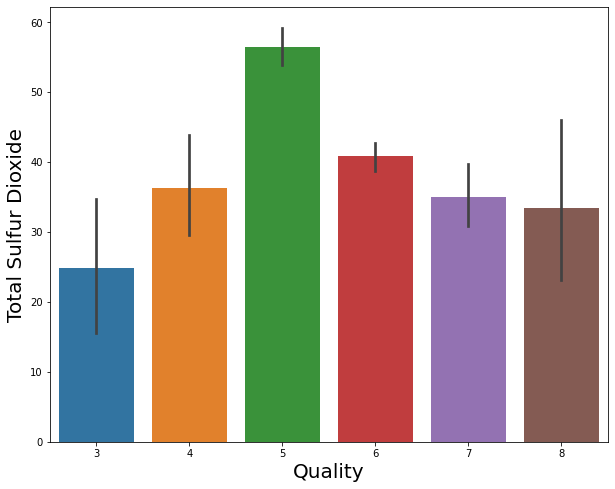

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(wine['quality'],wine['total sulfur dioxide'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('Total Sulfur Dioxide').set_size(20)


**Residual Sugar**

Residual Sugar, or RS for short, refers to any natural grape sugars that are leftover after fermentation ceases (whether on purpose or not). The juice of wine grapes starts out intensely sweet, and fermentation uses up that sugar as the yeasts feast upon it. The by-products are bubbly CO2 gas and our adorable amigo, alcohol.

There are many reasons why fermentation might stop. The age-old method has to do with alcohol toxicity. Different yeast strains can tolerate different levels of alcohol, so a weaker strain might die before eating all the sugar in the fermenting wine. In the case of a dessert wine like Sauternes or ice wine, the sugars are concentrated when the grapes get shriveled, so there's a lot of sugar to ferment. When alcohol reaches the level of a normal dry wine, say 12 or 14%, the yeast might die, but plenty of uneaten sugar is left. In the case of a fortified wine, hard booze is added to get a similar job done.

**In addition to its obvious sweetening power, sugar also has a bonus effect: it can help wines age well.** If you can go the long haul, say, a decade (or two, or three), the RS can bring deep dividends. We've talked a little about which wines age well: **those with a little RS can be the most exciting to taste as they evolve over time.** The sugar compounds change shape, and we perceive them less directly, so the wines even seem to dry out a bit.

**Whether your bottle is young or elderly, you should think of RS as having a balancing relationship with acidity.** They are on opposite sides of the seesaw, so if the wine has sugar you will probably want strong acidity, too—otherwise the wine will feel cloying.

**This fact can be proven below.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


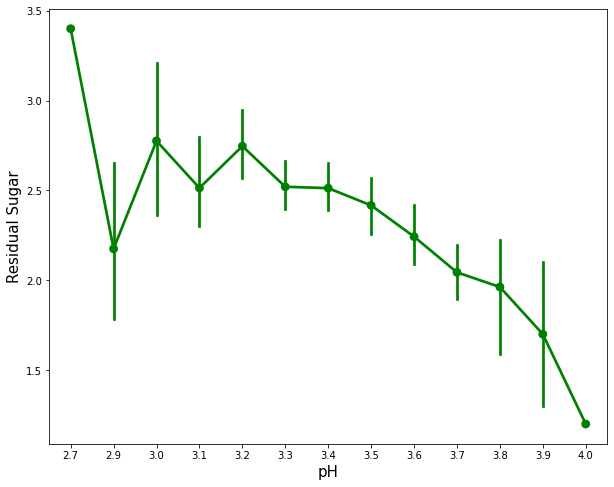

In [ ]:
plt.figure(figsize=(10,8))
sns.pointplot(wine['pH'].round(1),wine['residual sugar'], color='green')
plt.xlabel('pH').set_size(15)
plt.ylabel('Residual Sugar').set_size(15)

**From the graph, we can see that low levels of pH(High Acidity) have high levels of Sugar.**

**Chloride**

In every vineyard, a unique combination of climate, topography and soil, known as terroir, shapes the character of the vines and the grapes they yield. Typicity and quality of the wines are determined by the terroir that houses the vineyard. Such typicity is due to the complexity of its composition.

Among the main factors interfering with the typicity of wines are grape variety, region of origin, vintage, cultural traits and elaboration methods. Thus, by combining these distinctive factors, **several different wines can be created, each one of them with its own unique characteristics.**

**According to the findings, Australia wines have the highest levels of chlorides, followed by Argentinean wines, a country that bears the second position for the concentration levels of such ion.**

**Differences in the physicochemical characteristics of wines may be due to several factors. All of them are related to soil and climate conditions, as well as to oenological practices used during maturation of the grapes and vinification process.**

The amount of chloride in wine is influenced by both the terroir and type of grape, and the importance of quantification lies in the fact that wine flavor is strongly impacted by this particular ion, which, in high concentration, gives the wine an undesirable salty taste and significantly decreases its market appeal.

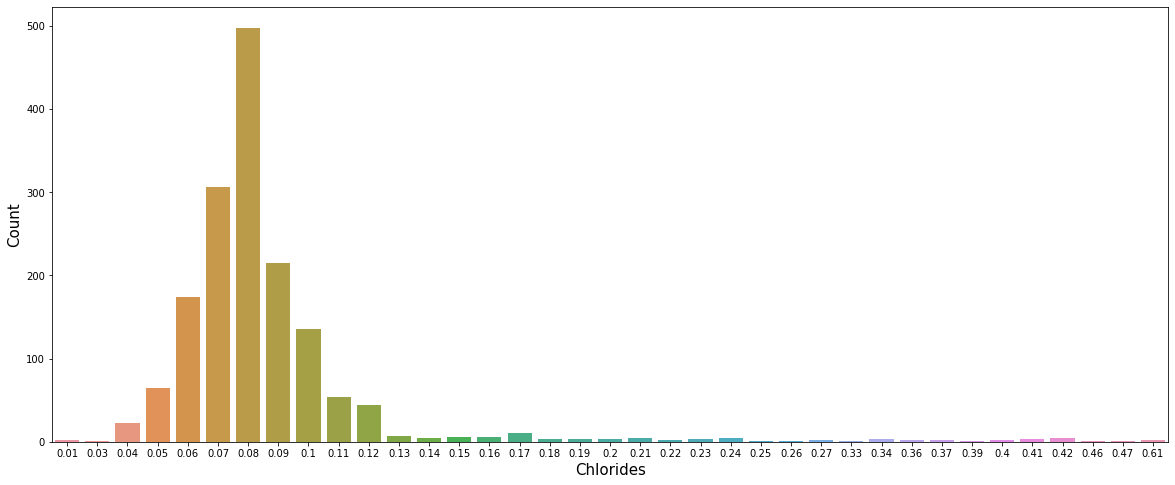

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=wine['chlorides'].round(2))
plt.xlabel('Chlorides').set_size(15)
plt.ylabel('Count').set_size(15)

**Red Wine Quality Prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(wine.drop(['quality'],axis=1))
scaled_feat = scaler.transform(wine.drop(['quality'],axis=1))
wine_scaled = pd.DataFrame(scaled_feat,columns=wine.columns[:-1])

**1. Prediction without arbitrary cut-off for Quality(Dependent Variable)**

**1.1 Using Train Test Split(Hold Out Method)**

**1.1.1 Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X = wine_scaled
y = wine['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
lr_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,lr_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix:")
lr_conf_matrix

Confusion Matrix:


,3,4,5,6,7,8
3,0,1,2,0,0,0
4,0,0,9,4,0,0
5,0,0,167,40,0,0
6,0,0,73,117,9,0
7,0,0,3,35,14,0
8,0,0,0,4,2,0


In [ ]:
lr_as = metrics.accuracy_score(y_test,lr_pred)
print("Accuracy Score: {}\n\n".format(lr_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,lr_pred)))

Accuracy Score: 0.6208333333333333


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.66      0.81      0.72       207
           6       0.58      0.59      0.59       199
           7       0.56      0.27      0.36        52
           8       0.00      0.00      0.00         6

    accuracy                           0.62       480
   macro avg       0.30      0.28      0.28       480
weighted avg       0.59      0.62      0.59       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**1.1.2 Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
dtc_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,dtc_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix: ")
dtc_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8
3,0,0,0,2,1,0
4,1,2,7,3,0,0
5,0,9,136,55,7,0
6,0,9,50,120,16,4
7,0,0,7,15,28,2
8,0,0,0,1,3,2


In [ ]:
dtc_as = metrics.accuracy_score(y_test,dtc_pred)
print("Accuracy Score: {}\n\n".format(dtc_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,dtc_pred)))

Accuracy Score: 0.6


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.10      0.15      0.12        13
           5       0.68      0.66      0.67       207
           6       0.61      0.60      0.61       199
           7       0.51      0.54      0.52        52
           8       0.25      0.33      0.29         6

    accuracy                           0.60       480
   macro avg       0.36      0.38      0.37       480
weighted avg       0.61      0.60      0.60       480



**1.1.3 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=20)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
rfc_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,rfc_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix: ")
rfc_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8
3,0,0,3,0,0,0
4,1,0,10,2,0,0
5,0,0,170,35,2,0
6,0,0,55,132,11,1
7,0,0,3,26,23,0
8,0,0,0,2,3,1


In [ ]:
rfc_as = metrics.accuracy_score(y_test,rfc_pred)
print("Accuracy Score: {}\n\n".format(rfc_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,rfc_pred)))

Accuracy Score: 0.6791666666666667


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.71      0.82      0.76       207
           6       0.67      0.66      0.67       199
           7       0.59      0.44      0.51        52
           8       0.50      0.17      0.25         6

    accuracy                           0.68       480
   macro avg       0.41      0.35      0.36       480
weighted avg       0.65      0.68      0.66       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**1.1.4 K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
knn_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,knn_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix: ")
knn_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8
3,0,2,1,0,0,0
4,1,1,6,5,0,0
5,3,5,150,40,9,0
6,0,4,54,123,18,0
7,0,0,7,14,30,1
8,0,0,0,1,4,1


In [ ]:
knn_as = metrics.accuracy_score(y_test,knn_pred)
print("Accuracy Score: {}\n\n".format(knn_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,knn_pred)))

Accuracy Score: 0.6354166666666666


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.08      0.08        13
           5       0.69      0.72      0.71       207
           6       0.67      0.62      0.64       199
           7       0.49      0.58      0.53        52
           8       0.50      0.17      0.25         6

    accuracy                           0.64       480
   macro avg       0.41      0.36      0.37       480
weighted avg       0.64      0.64      0.63       480



**1.1.5 Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_pred = svm.predict(X_test)

In [ ]:
svm_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,svm_pred),index=[[3,4,5,6,7,8]], columns=[[3,4,5,6,7,8]])
print("Confusion Matrix: ")
svm_conf_matrix

Confusion Matrix: 


,3,4,5,6,7,8
3,0,0,3,0,0,0
4,0,0,9,4,0,0
5,0,0,171,34,2,0
6,0,0,70,122,7,0
7,0,0,4,32,16,0
8,0,0,0,4,2,0


In [ ]:
svm_as = metrics.accuracy_score(y_test,svm_pred)
print("Accuracy Score: {}\n\n".format(svm_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,svm_pred)))

Accuracy Score: 0.64375


Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.67      0.83      0.74       207
           6       0.62      0.61      0.62       199
           7       0.59      0.31      0.41        52
           8       0.00      0.00      0.00         6

    accuracy                           0.64       480
   macro avg       0.31      0.29      0.29       480
weighted avg       0.61      0.64      0.62       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
summary_table_1_1 = pd.DataFrame([lr_as,dtc_as,rfc_as,knn_as,svm_as],index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'], columns=['Accuracy Score'])
print("Summary Table for Section 1.1")
summary_table_1_1

Summary Table for Section 1.1


,Accuracy Score
Logistic Regression,0.620833
Decision Tree,0.600000
Random Forest,0.679167
KNN,0.635417
SVM,0.643750


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


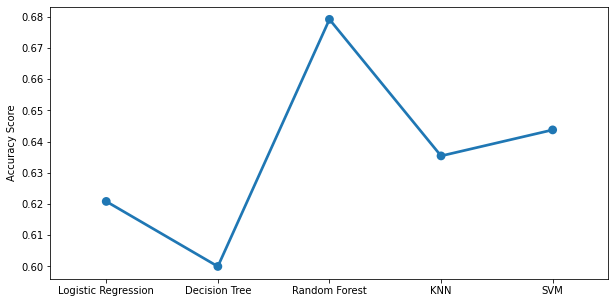

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(summary_table_1_1.index,summary_table_1_1['Accuracy Score'])

**Conclusion:**

From the summary table, we can see that the accuracy is low in all the models.

**1.2 K-Fold Cross-Validation Method**

For SVM, we shall perform Grid Search instead of Cross Validation.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lr_cross = LogisticRegression()
dtc_cross = DecisionTreeClassifier()
rfc_cross = RandomForestClassifier(n_estimators=20)
knn_cross = KNeighborsClassifier(n_neighbors=1)
svm_grid = SVC()

In [ ]:
lr_scores = cross_val_score(lr_cross,X,y,cv=10,scoring='accuracy')
dtc_scores = cross_val_score(dtc_cross,X,y,cv=10,scoring='accuracy')
rfc_scores = cross_val_score(rfc_cross,X,y,cv=10,scoring='accuracy')
knn_scores = cross_val_score(knn_cross,X,y,cv=10,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**GridSearch for SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [ ]:
grid = GridSearchCV(svm_grid,param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_predicitons = grid.predict(X_test)

In [ ]:
svm_grid_score = metrics.accuracy_score(y_test,grid_predicitons)

In [ ]:
summary_table_1_2 = pd.DataFrame([lr_scores.mean(),dtc_scores.mean(),rfc_scores.mean(),knn_scores.mean(),svm_grid_score],index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'], columns=['Accuracy Score'])
print("Summary Table for Section 1.2")
summary_table_1_2

Summary Table for Section 1.2


,Accuracy Score
Logistic Regression,0.590366
Decision Tree,0.476549
Random Forest,0.554116
KNN,0.488483
SVM,0.660417


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


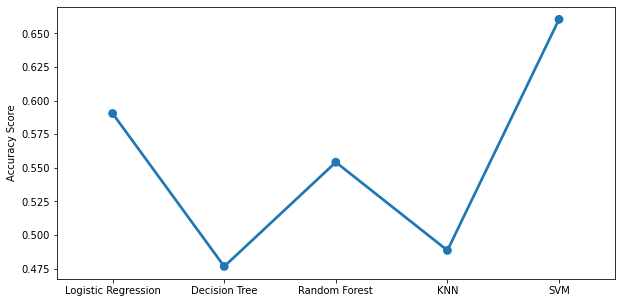

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(summary_table_1_2.index,summary_table_1_2['Accuracy Score'])

**Conclusion:**

Again, there seems to be no improvement in the Accuracy Scores in all the models.

Hence, we shall apply some cut-off our Dependent Variable(Quality) which will help in reducing the number of classes.

**2. Prediction with arbitrary cut-off for Quality(Dependent Variable)**

Let us encode the quality as follows to check if there is any improvement in scores:

**3-4 : Poor**

**5-6 : Average**

**7-8 : Good**

Also, we will directly use the cross-validation method to the perform the prediction

Quality Encoding

In [ ]:
def add_encode(quality):
    if quality == 3 or quality == 4:
        return 0
    elif quality == 5 or quality == 6:
        return 1
    else:
        return 2

In [ ]:
wine['quality_encoding'] = wine['quality'].apply(add_encode)

In [ ]:
wine['quality_remarks'] = wine['quality_encoding'].map({0:'Poor',1:'Average',2:'Good'})


In [ ]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_encoding,quality_remarks
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,Average


In [ ]:
scaler = StandardScaler()
scaler.fit(wine.drop(['quality','quality_encoding', 'quality_remarks'],axis=1))
scaled_feat = scaler.transform(wine.drop(['quality','quality_encoding', 'quality_remarks'],axis=1))
wine_scaled_enc = pd.DataFrame(scaled_feat,columns=wine.columns[:-3])

In [ ]:
X_enc = wine_scaled_enc
y_enc = wine['quality_encoding']

In [ ]:
lr_cross_enc = LogisticRegression()
dtc_cross_enc = DecisionTreeClassifier()
rfc_cross_enc = RandomForestClassifier(n_estimators=20)
knn_cross_enc = KNeighborsClassifier(n_neighbors=1)
svm_grid_enc = SVC()

In [ ]:
lr_scores_enc = cross_val_score(lr_cross,X_enc,y_enc,cv=10,scoring='accuracy')
dtc_scores_enc = cross_val_score(dtc_cross,X_enc,y_enc,cv=10,scoring='accuracy')
rfc_scores_enc = cross_val_score(rfc_cross,X_enc,y_enc,cv=10,scoring='accuracy')
knn_scores_enc = cross_val_score(knn_cross,X_enc,y_enc,cv=10,scoring='accuracy')

GridSearch for SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.30)
grid_enc = GridSearchCV(svm_grid_enc,param_grid)

In [ ]:
grid_enc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_predicitons_enc = grid_enc.predict(X_test)

In [ ]:
svm_grid_score_enc = metrics.accuracy_score(y_test,grid_predicitons_enc)

In [ ]:
summary_table_2 = pd.DataFrame([lr_scores_enc.mean(),dtc_scores_enc.mean(),rfc_scores_enc.mean(),knn_scores_enc.mean(),svm_grid_score_enc],index=['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'], columns=['Accuracy Score'])
print("Summary Table for Section 2")
summary_table_2

Summary Table for Section 2


,Accuracy Score
Logistic Regression,0.834902
Decision Tree,0.739831
Random Forest,0.834898
KNN,0.765515
SVM,0.860417


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


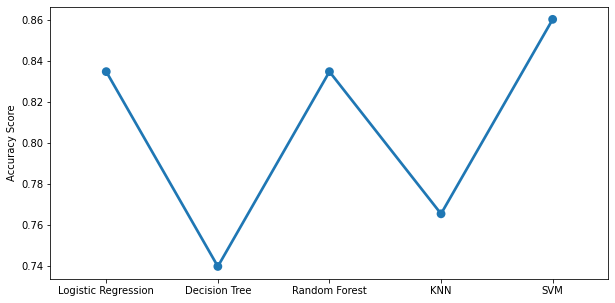

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(summary_table_2.index,summary_table_2['Accuracy Score'])

**Conclusion:**

As evident, there is a tremendous improvement in the accuracy, if we reduce the number of classes, with SVM being the best model.

Accuracy scores are likely to improve further, if we categorize the dependent variable(Quality) to just two classes, say 'Good' and 'Bad.'



In [ ]:
overall_summary = pd.concat([summary_table_1_1,summary_table_1_2,summary_table_2],axis=1)
overall_summary.columns = ['Without Encoding, Hold-Out','Without Encoding, K-fold','With Encoding']

In [ ]:
overall_summary

,"Without Encoding, Hold-Out","Without Encoding, K-fold",With Encoding
Logistic Regression,0.620833,0.590366,0.834902
Decision Tree,0.600000,0.476549,0.739831
Random Forest,0.679167,0.554116,0.834898
KNN,0.635417,0.488483,0.765515
SVM,0.643750,0.660417,0.860417


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


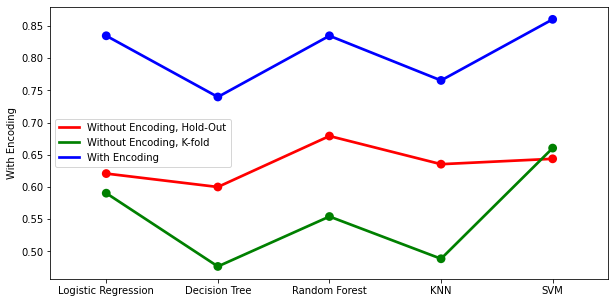

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.pointplot(overall_summary.index,overall_summary['Without Encoding, Hold-Out'],color='red')
ax = sns.pointplot(overall_summary.index,overall_summary['Without Encoding, K-fold'],color='green')
ax = sns.pointplot(overall_summary.index,overall_summary['With Encoding'],color='blue')
ax.legend(handles=ax.lines[::len(overall_summary)+1], labels=["Without Encoding, Hold-Out","Without Encoding, K-fold","With Encoding"])